<a href="https://colab.research.google.com/github/MohammadEslamiNezhad/House-Price-Prediction-With-ML/blob/main/california_housing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import neccessaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## import dataset

In [ ]:
# Load the dataset
dataset_path = './california_housing.csv'
california_df = pd.read_csv(dataset_path)

# Display the first 5 rows
california_df.head()

Unnamed: 0  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0           0  8.3252      41.0  6.984127   1.023810       322.0  2.555556   
1           1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842   
2           2  7.2574      52.0  8.288136   1.073446       496.0  2.802260   
3           3  5.6431      52.0  5.817352   1.073059       558.0  2.547945   
4           4  3.8462      52.0  6.281853   1.081081       565.0  2.181467   

   Latitude  Longitude  MedHouseVal  
0     37.88    -122.23        4.526  
1     37.86    -122.22        3.585  
2     37.85    -122.24        3.521  
3     37.85    -122.25        3.413  
4     37.85    -122.25        3.422

# data cleaning

In [ ]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   20640 non-null  int64  
 1   MedInc       20640 non-null  float64
 2   HouseAge     20640 non-null  float64
 3   AveRooms     20640 non-null  float64
 4   AveBedrms    20640 non-null  float64
 5   Population   20640 non-null  float64
 6   AveOccup     20640 non-null  float64
 7   Latitude     20640 non-null  float64
 8   Longitude    20640 non-null  float64
 9   MedHouseVal  20640 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [ ]:
# check for negative or duplicate values
for col in california_df.columns :
    if col not in ["Longitude", "Latitude"] and (california_df[col] < 0).any() :
        california_df[col] = california_df[col].abs()
        print(col)

    is_duplicated = california_df.duplicated().any()
    print(col, " : ", is_duplicated)

Unnamed: 0  :  False
MedInc  :  False
HouseAge  :  False
AveRooms  :  False
AveBedrms  :  False
Population  :  False
AveOccup  :  False
Latitude  :  False
Longitude  :  False
MedHouseVal  :  False


In [ ]:
is_index = (california_df['Unnamed: 0'] == california_df.index).all()
if is_index :
    california_df.drop('Unnamed: 0', axis = 1, inplace = True)
    california_df.reset_index(drop = True, inplace = True)
    print('"Unnamed: 0" col is dropped')

"Unnamed: 0" col is dropped


## Feature engeneering

In [ ]:
california_df['PopulInc'] = california_df.MedInc * california_df.Population
california_df['HouseholdPerRoom'] = california_df.AveOccup / california_df.AveRooms
california_df['HouseholdPerBedRoom'] = california_df.AveOccup / california_df.AveBedrms
california_df['PopulPerHouAge'] = california_df.Population / california_df.HouseAge
california_df['HouseholdNum'] = california_df.Population / california_df.AveOccup

calclulating distance of big cities and big companies
extract data using ChatGPT

In [ ]:
cities = {
    'San_Fransisco' : {
        'Latitude' : 37.7749,
        'Longitude' : -122.4194
    },
    'San_Jose' : {
        'Latitude' : 37.3355,
        'Longitude' : -112.8390
    },
    'Los_Angles' : {
        'Latitude' : 34.052235,
        'Longitude' : -118.243684
    },
    'San_Diego' : {
        'Latitude' : 32.7153,
        'Longitude' : -117.1573
    },
    'Sacramento' : {
        'Latitude' : 38.575764,
        'Longitude' : -121.478851
    }
}
cities = pd.DataFrame(cities)
cities

San_Fransisco  San_Jose  Los_Angles  San_Diego  Sacramento
Latitude         37.7749   37.3355   34.052235    32.7153   38.575764
Longitude      -122.4194 -112.8390 -118.243684  -117.1573 -121.478851

In [ ]:
companies = {
    'Apple_Park' : {
        'Latitude' : 37.334606,
        'Longitude' : -122.009102
    },
    'Googleplex' : {
        'Latitude' : 37.422131,
        'Longitude' : -122.084801
    },
    'Meta' : {
        'Latitude' : 37.04846,
        'Longitude' : -122.1478
    },
    'NVIDIA' : {
        'Latitude' : 37.3691,
        'Longitude' : -121.9582
    },
    'Intel' : {
        'Latitude' : 37.3861,
        'Longitude' : -121.9776
    },
    'Tesla' : {
        'Latitude' : 37.5483,
        'Longitude' : -121.9886
    },
    'Adobe' : {
        'Latitude' : 37.3333,
        'Longitude' : -121.8930
    },
    'Cisco_Systems' : {
        'Latitude' : 37.4084,
        'Longitude' : -121.9542
    },
    'Oracle' : {
        'Latitude': 37.5330,
        'Longitude' : -122.2560
    },
    'Sales_Force' : {
        'Latitude' : 37.7899,
        'Longitude' : -122.3969
    },
    'Netflix' : {
        'Latitude' : 37.2361,
        'Longitude' : -121.9617
    }
}
companies = pd.DataFrame(companies)
companies

Apple_Park  Googleplex       Meta    NVIDIA     Intel     Tesla  \
Latitude    37.334606   37.422131   37.04846   37.3691   37.3861   37.5483   
Longitude -122.009102 -122.084801 -122.14780 -121.9582 -121.9776 -121.9886   

              Adobe  Cisco_Systems   Oracle  Sales_Force   Netflix  
Latitude    37.3333        37.4084   37.533      37.7899   37.2361  
Longitude -121.8930      -121.9542 -122.256    -122.3969 -121.9617

In [ ]:
def haversine_km(lat1, lon1, lat2, lon2) :
    '''haversine function for calculating distance'''
    R = 6371.0 # earth radius by km
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlanda = np.radians(lon2 - lon1)
    under_radical = (np.sin(dphi / 2) ** 2) + (np.cos(phi1) * np.cos(phi2) * (np.sin(dlanda / 2) ** 2))
    distance = 2 * R * np.arcsin(np.sqrt(under_radical))
    return distance

def adding_distance_features(targets) :
    global california_df
    for target in targets.columns :
        col_name = f'DistanceFrom{target}'
        california_df[col_name]= haversine_km(
            targets[target]['Latitude'],
            targets[target]['Longitude'],
            california_df['Latitude'],
            california_df['Longitude'])

In [ ]:
adding_distance_features(cities)
adding_distance_features(companies)
california_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal    PopulInc  ...  DistanceFromGoogleplex  \
0        -122.23        4.526   2680.7144  ...               52.492930   
1        -122.22        3.585  19931.6614  ...               50.122948   
2        -122.24        3.521   3599.6704  ...               49.500706   
3        -122.25        3.413   3148.8498  ...               49.751007   
4        -122.25        3.422   2173.1030  ...               49.751007   
...          ...          ...         ...  ...                     ...   
20635    -121.09        0.781   1318.4535  ...              244.668694   
20636    -121.21        0.771    910.2208  ...              242.221662   
20637    -121.22        0.923   1711.9000  ...              235.628257   
20638    -121.32        0.847   1383.5952  ...              232.990243   
20639    -121.24        0.894   3312.9882  ...              228.760331   

       DistanceFromMeta  DistanceFromNVIDIA  DistanceFromIntel  \
0             92.747198           61.646581          59.246189   
1             90.463893           59.256450          56.855450   
2             89.498027           58.954226          56.524072   
3             89.582617           59.330496          56.889873   
4             89.582617           59.330496          56.889873   
...                 ...                 ...                ...   
20635        285.705804          246.601608         245.327451   
20636        283.557508          244.670227         243.305397   
20637        276.930056          238.016770         236.661092   
20638        274.502686          235.811548         234.380820   
20639        270.049342          231.129611         229.775875   

       DistanceFromTesla  DistanceFromAdobe  DistanceFromCisco_Systems  \
0              42.559076          67.651529                  57.788975   
1              40.195777          65.268612                  55.402476   
2              40.182797          65.082556                  55.178122   
3              40.673714          65.501070                  55.585332   
4              40.673714          65.501070                  55.585332   
...                  ...                ...                        ...   
20635         228.577766         248.742273                 242.331216   
20636         226.280716         247.084778                 240.362092   
20637         219.666274         240.406909                 233.712079   
20638         217.174746         238.430532                 231.480162   
20639         212.790224         233.517461                 226.825603   

       DistanceFromOracle  DistanceFromSales_Force  DistanceFromNetflix  
0               38.652374                17.753984            75.403228  
1               36.498439                17.383009            73.016170  
2               35.276895                15.316503            72.538306  
3               35.252745                14.531201            72.841250  
4               35.252745                14.531201            72.841250  
...                   ...      

## description stats

In [ ]:
desc_stat = california_df.describe().T
desc_stat['R'] = california_df.max() - california_df.min()
desc_stat['std ^ 2'] = desc_stat['std'] ** 2
desc_stat['CV%'] = 100 * desc_stat['std'] / desc_stat['mean']
desc_stat

count         mean          std         min  \
MedInc                     20640.0     3.870671     1.899822    0.499900   
HouseAge                   20640.0    28.639486    12.585558    1.000000   
AveRooms                   20640.0     5.429000     2.474173    0.846154   
AveBedrms                  20640.0     1.096675     0.473911    0.333333   
Population                 20640.0  1425.476744  1132.462122    3.000000   
AveOccup                   20640.0     3.070655    10.386050    0.692308   
Latitude                   20640.0    35.631861     2.135952   32.540000   
Longitude                  20640.0  -119.569704     2.003532 -124.350000   
MedHouseVal                20640.0     2.068558     1.153956    0.149990   
PopulInc                   20640.0  5527.951974  5590.224782    1.608000   
HouseholdPerRoom           20640.0     0.619576     2.894913    0.018109   
HouseholdPerBedRoom        20640.0     2.909634    11.420442    0.070450   
PopulPerHouAge             20640.0    83.381516   177.699913    0.153846   
HouseholdNum               20640.0   499.539680   382.329753    1.000000   
DistanceFromSan_Fransisco  20640.0   386.074815   250.068487    0.547401   
DistanceFromSan_Jose       20640.0   684.379251   109.234550  316.857307   
DistanceFromLos_Angles     20640.0   269.421971   247.732415    0.420663   
DistanceFromSan_Diego      20640.0   398.361502   289.446315    0.580458   
DistanceFromSacramento     20640.0   404.805117   247.269814    0.481495   
DistanceFromApple_Park     20640.0   353.552242   220.361616    0.605017   
DistanceFromGoogleplex     20640.0   358.697058   227.233996    0.516665   
DistanceFromMeta           20640.0   355.998088   204.397633    3.358992   
DistanceFromNVIDIA         20640.0   352.321677   221.033981    0.731518   
DistanceFromIntel          20640.0   353.466572   222.536709    1.178236   
DistanceFromTesla          20640.0   358.506656   231.427675    0.225756   
DistanceFromAdobe          20640.0   349.137881   217.020922    0.452772   
DistanceFromCisco_Systems  20640.0   353.156543   223.110955    0.411418   
DistanceFromOracle         20640.0   369.453531   236.584047    0.485478   
DistanceFromSales_Force    20640.0   385.517091   250.421556    0.272634   
DistanceFromNetflix        20640.0   349.914348   212.896183    0.459031   

                                   25%          50%          75%  \
MedInc                        2.563400     3.534800     4.743250   
HouseAge                     18.000000    29.000000    37.000000   
AveRooms                      4.440716     5.229129     6.052381   
AveBedrms                     1.006079     1.048780     1.099526   
Population                  787.000000  1166.000000  1725.000000   
AveOccup                      2.429741     2.818116     3.282261   
Latitude                     33.930000    34.260000    37.710000   
Longitude                  -121.800000  -118.490000  -118.010000   
MedHouseVal                   1.196000     1.797000     2.647250   
PopulInc                   2462.718700  4149.025900  6713.335575   
HouseholdPerRoom              0.435523     0.516013     0.656865   
HouseholdPerBedRoom           2.259110     2.688006     3.168002   
PopulPerHouAge               23.543706    41.690972    80.333333   
HouseholdNum                280.000000   409.000000   605.000000   
DistanceFromSan_Fransisco   116.671158   525.895075   583.940088   
DistanceFromSan_Jose        606.971958   629.021720   795.333268   
DistanceFromLos_Angles       32.111273   173.667515   527.156180   
DistanceFromSan_Diego       159.601889   214.917357   706.049400   
DistanceFromSacramento      131.963466   549.002398   603.746012   
DistanceFromApple_Park      113.378584   466.671312   524.001697   
DistanceFromGoogleplex      109.020187   478.094081   535.349456   
DistanceFromMeta            140.776044   454.646897   511.133267   
DistanceFromNVIDIA          110.198411   466.302197   523.527973   
DistanceFromIntel           108.690416  

# data visualization

## checking "mean house value" distribution

<Axes: >

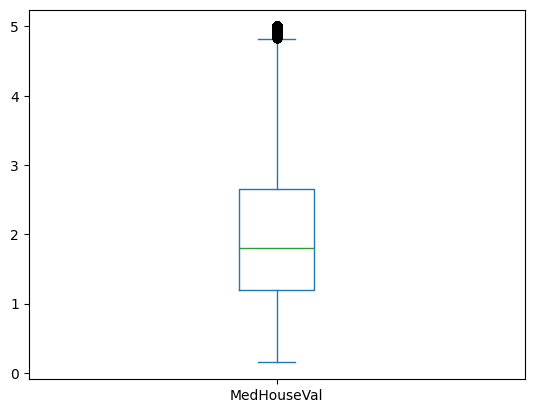

In [ ]:
california_df.plot(y = 'MedHouseVal', kind = 'box')

<Axes: ylabel='Density'>

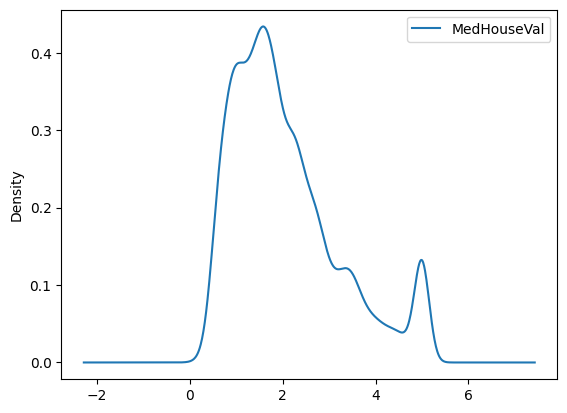

In [ ]:
california_df.plot(y = 'MedHouseVal', kind = 'kde')

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


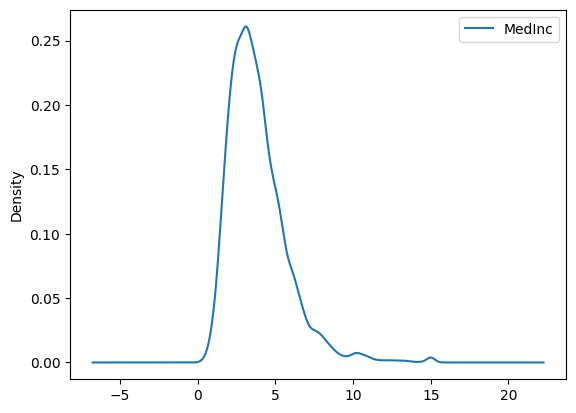

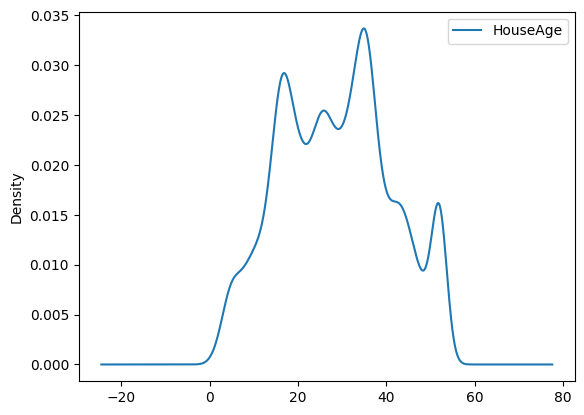

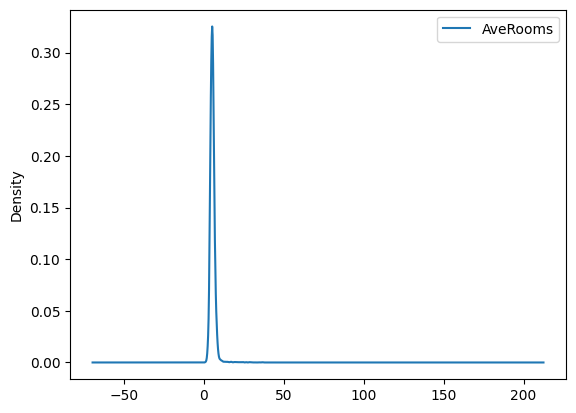

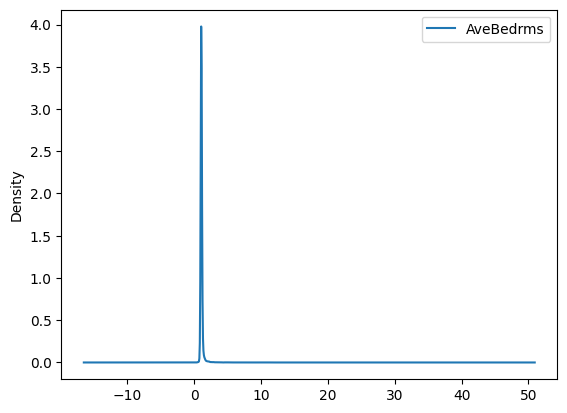

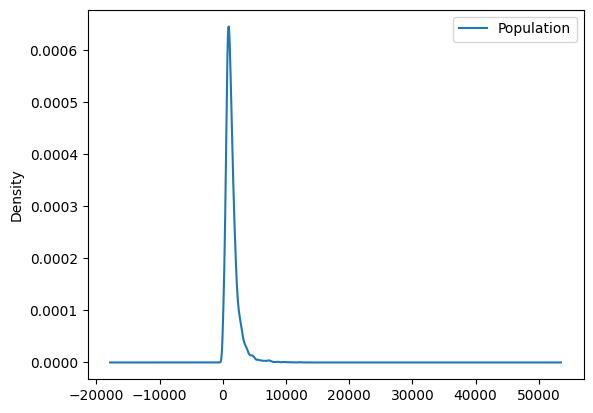

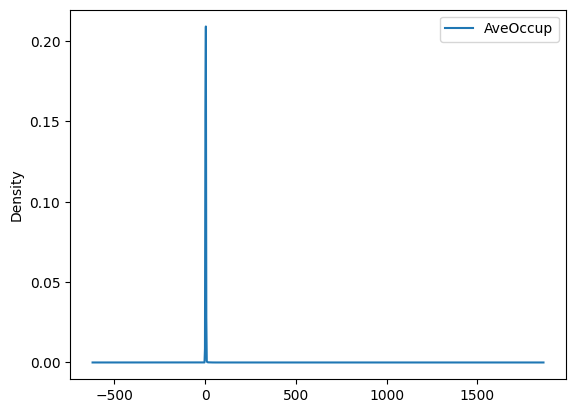

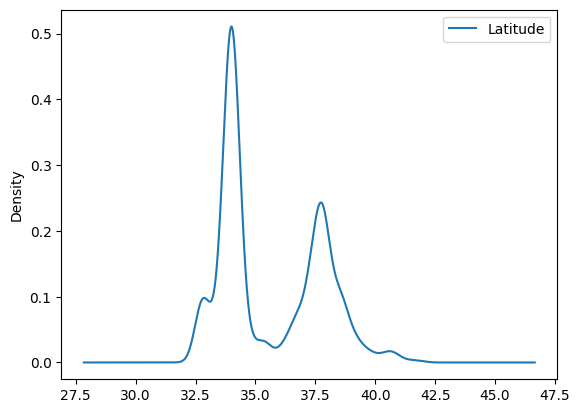

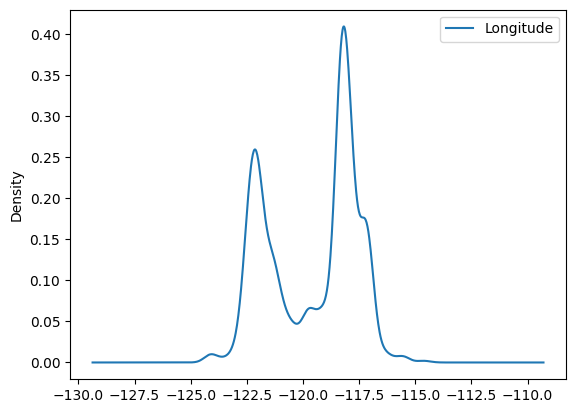

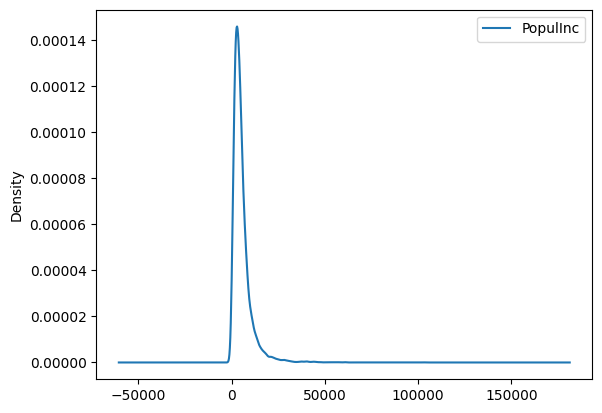

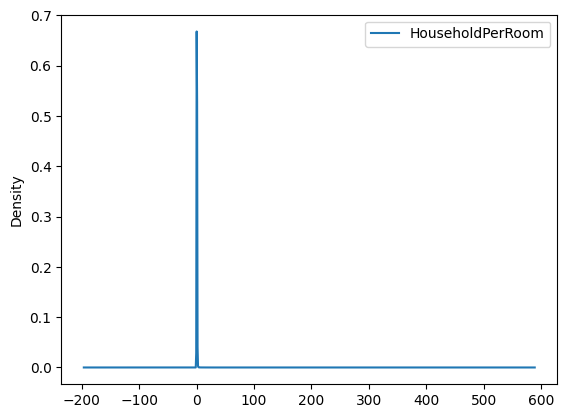

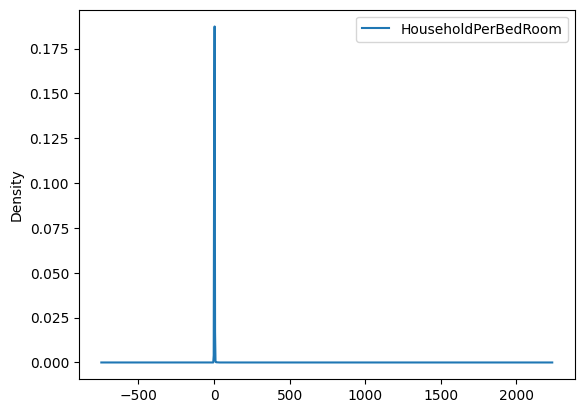

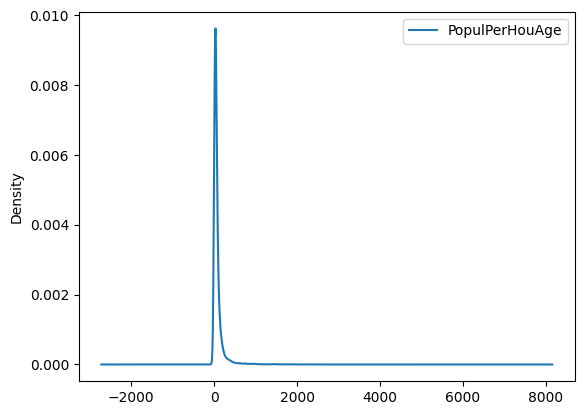

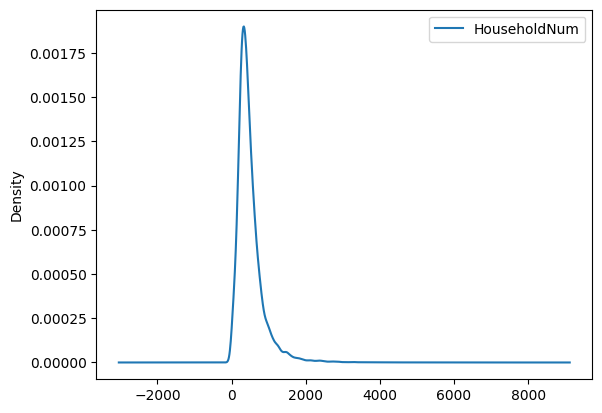

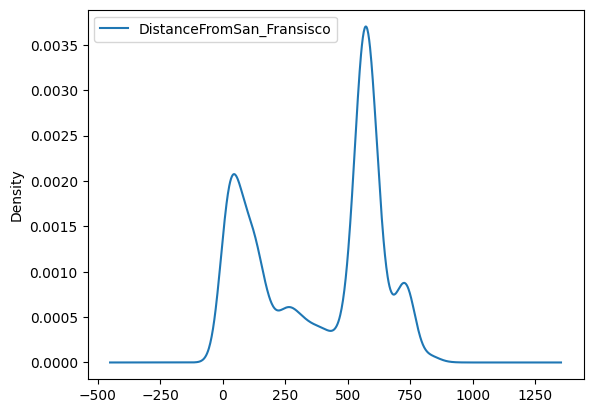

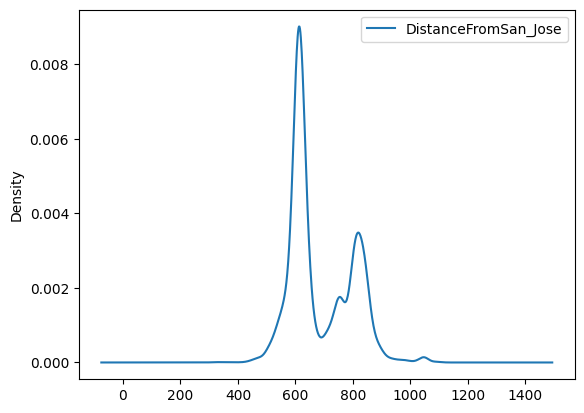

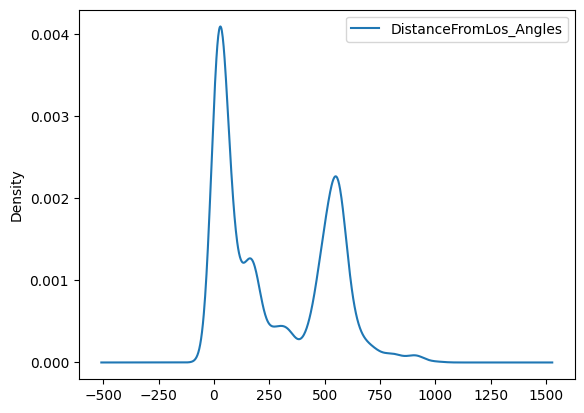

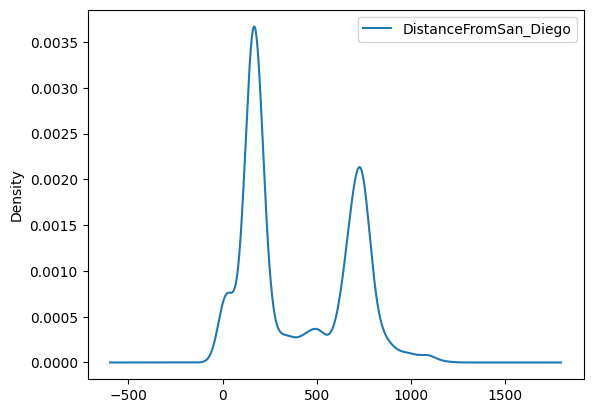

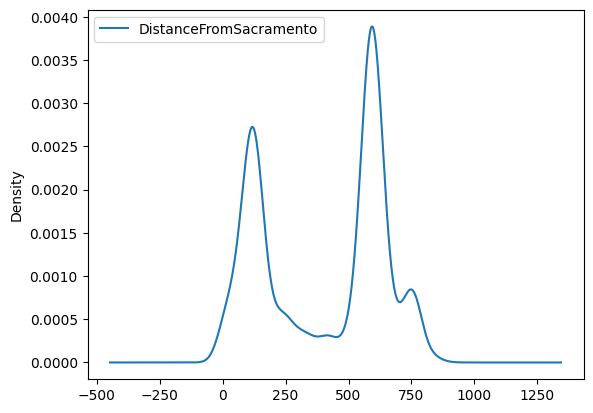

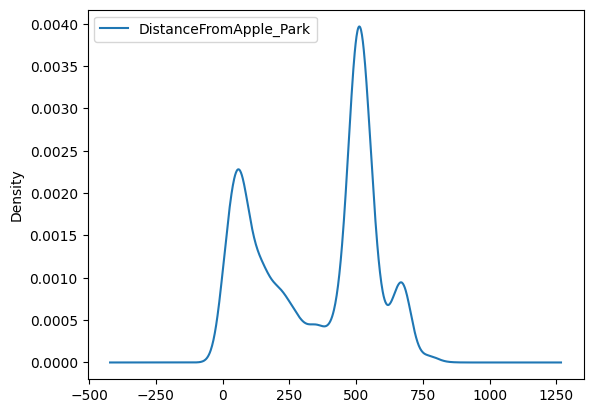

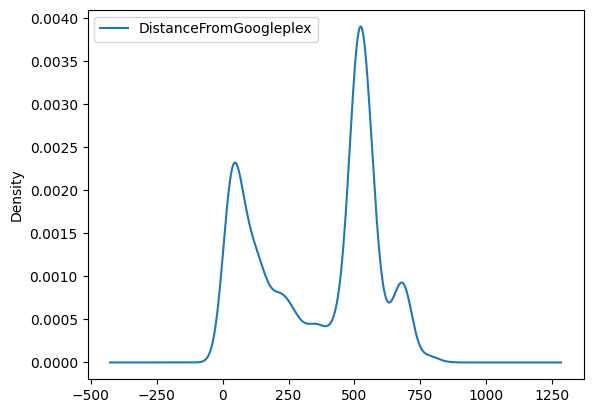

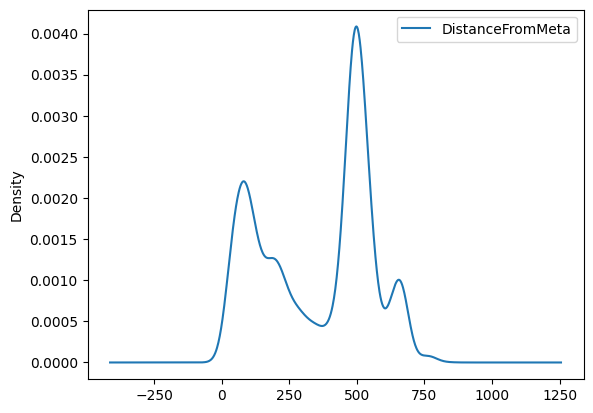

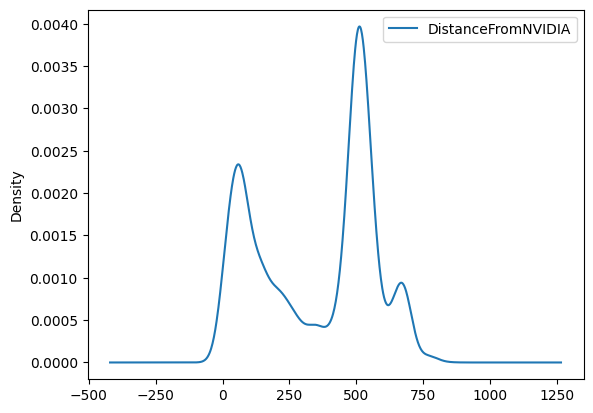

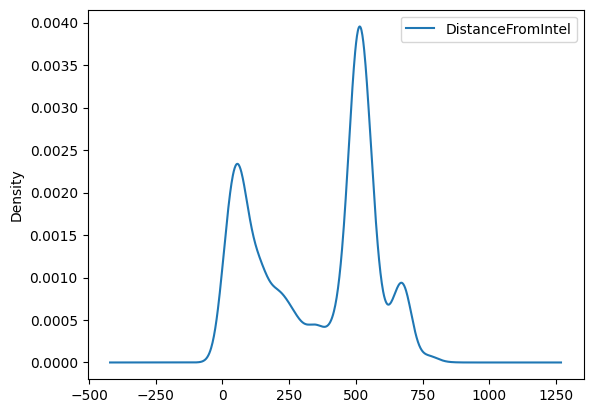

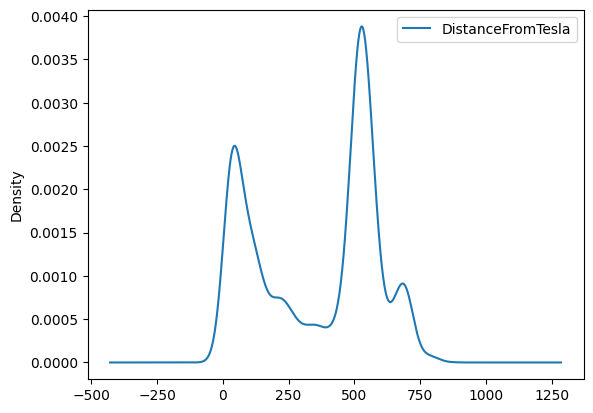

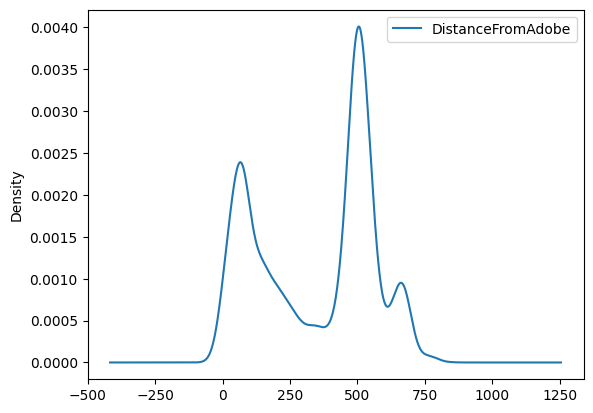

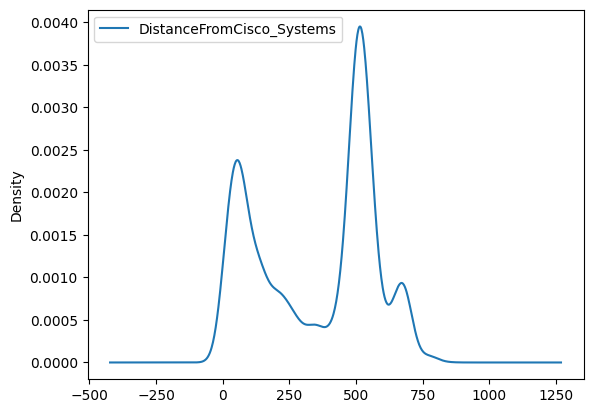

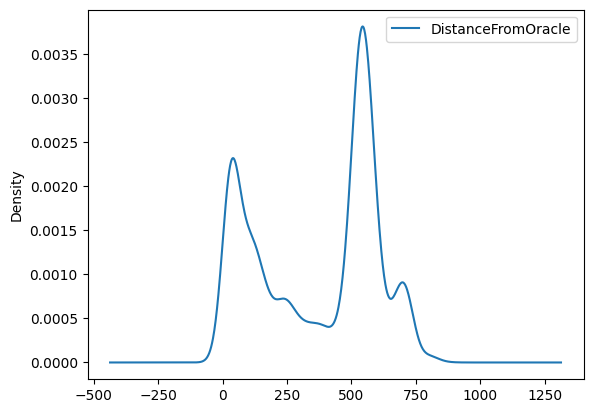

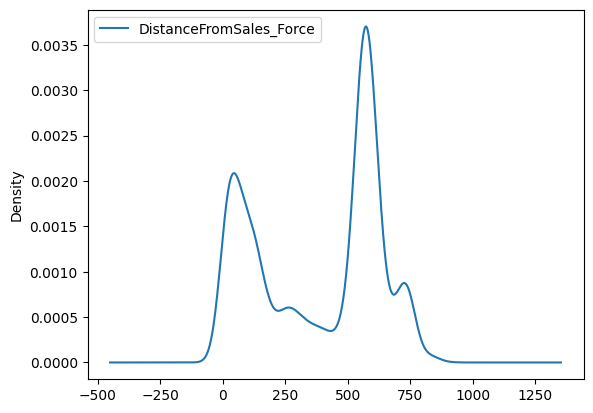

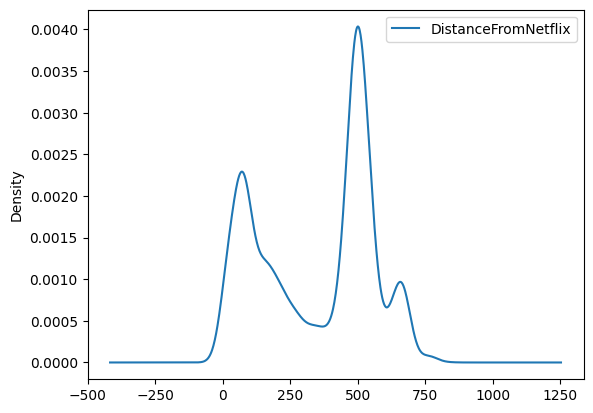

In [ ]:
# finding feature distribution
for column in california_df.columns :
    if column == 'MedHouseVal' :
        continue
    california_df.plot(y = column, kind = 'kde')

## Visualize features to identify factors causing bimodality

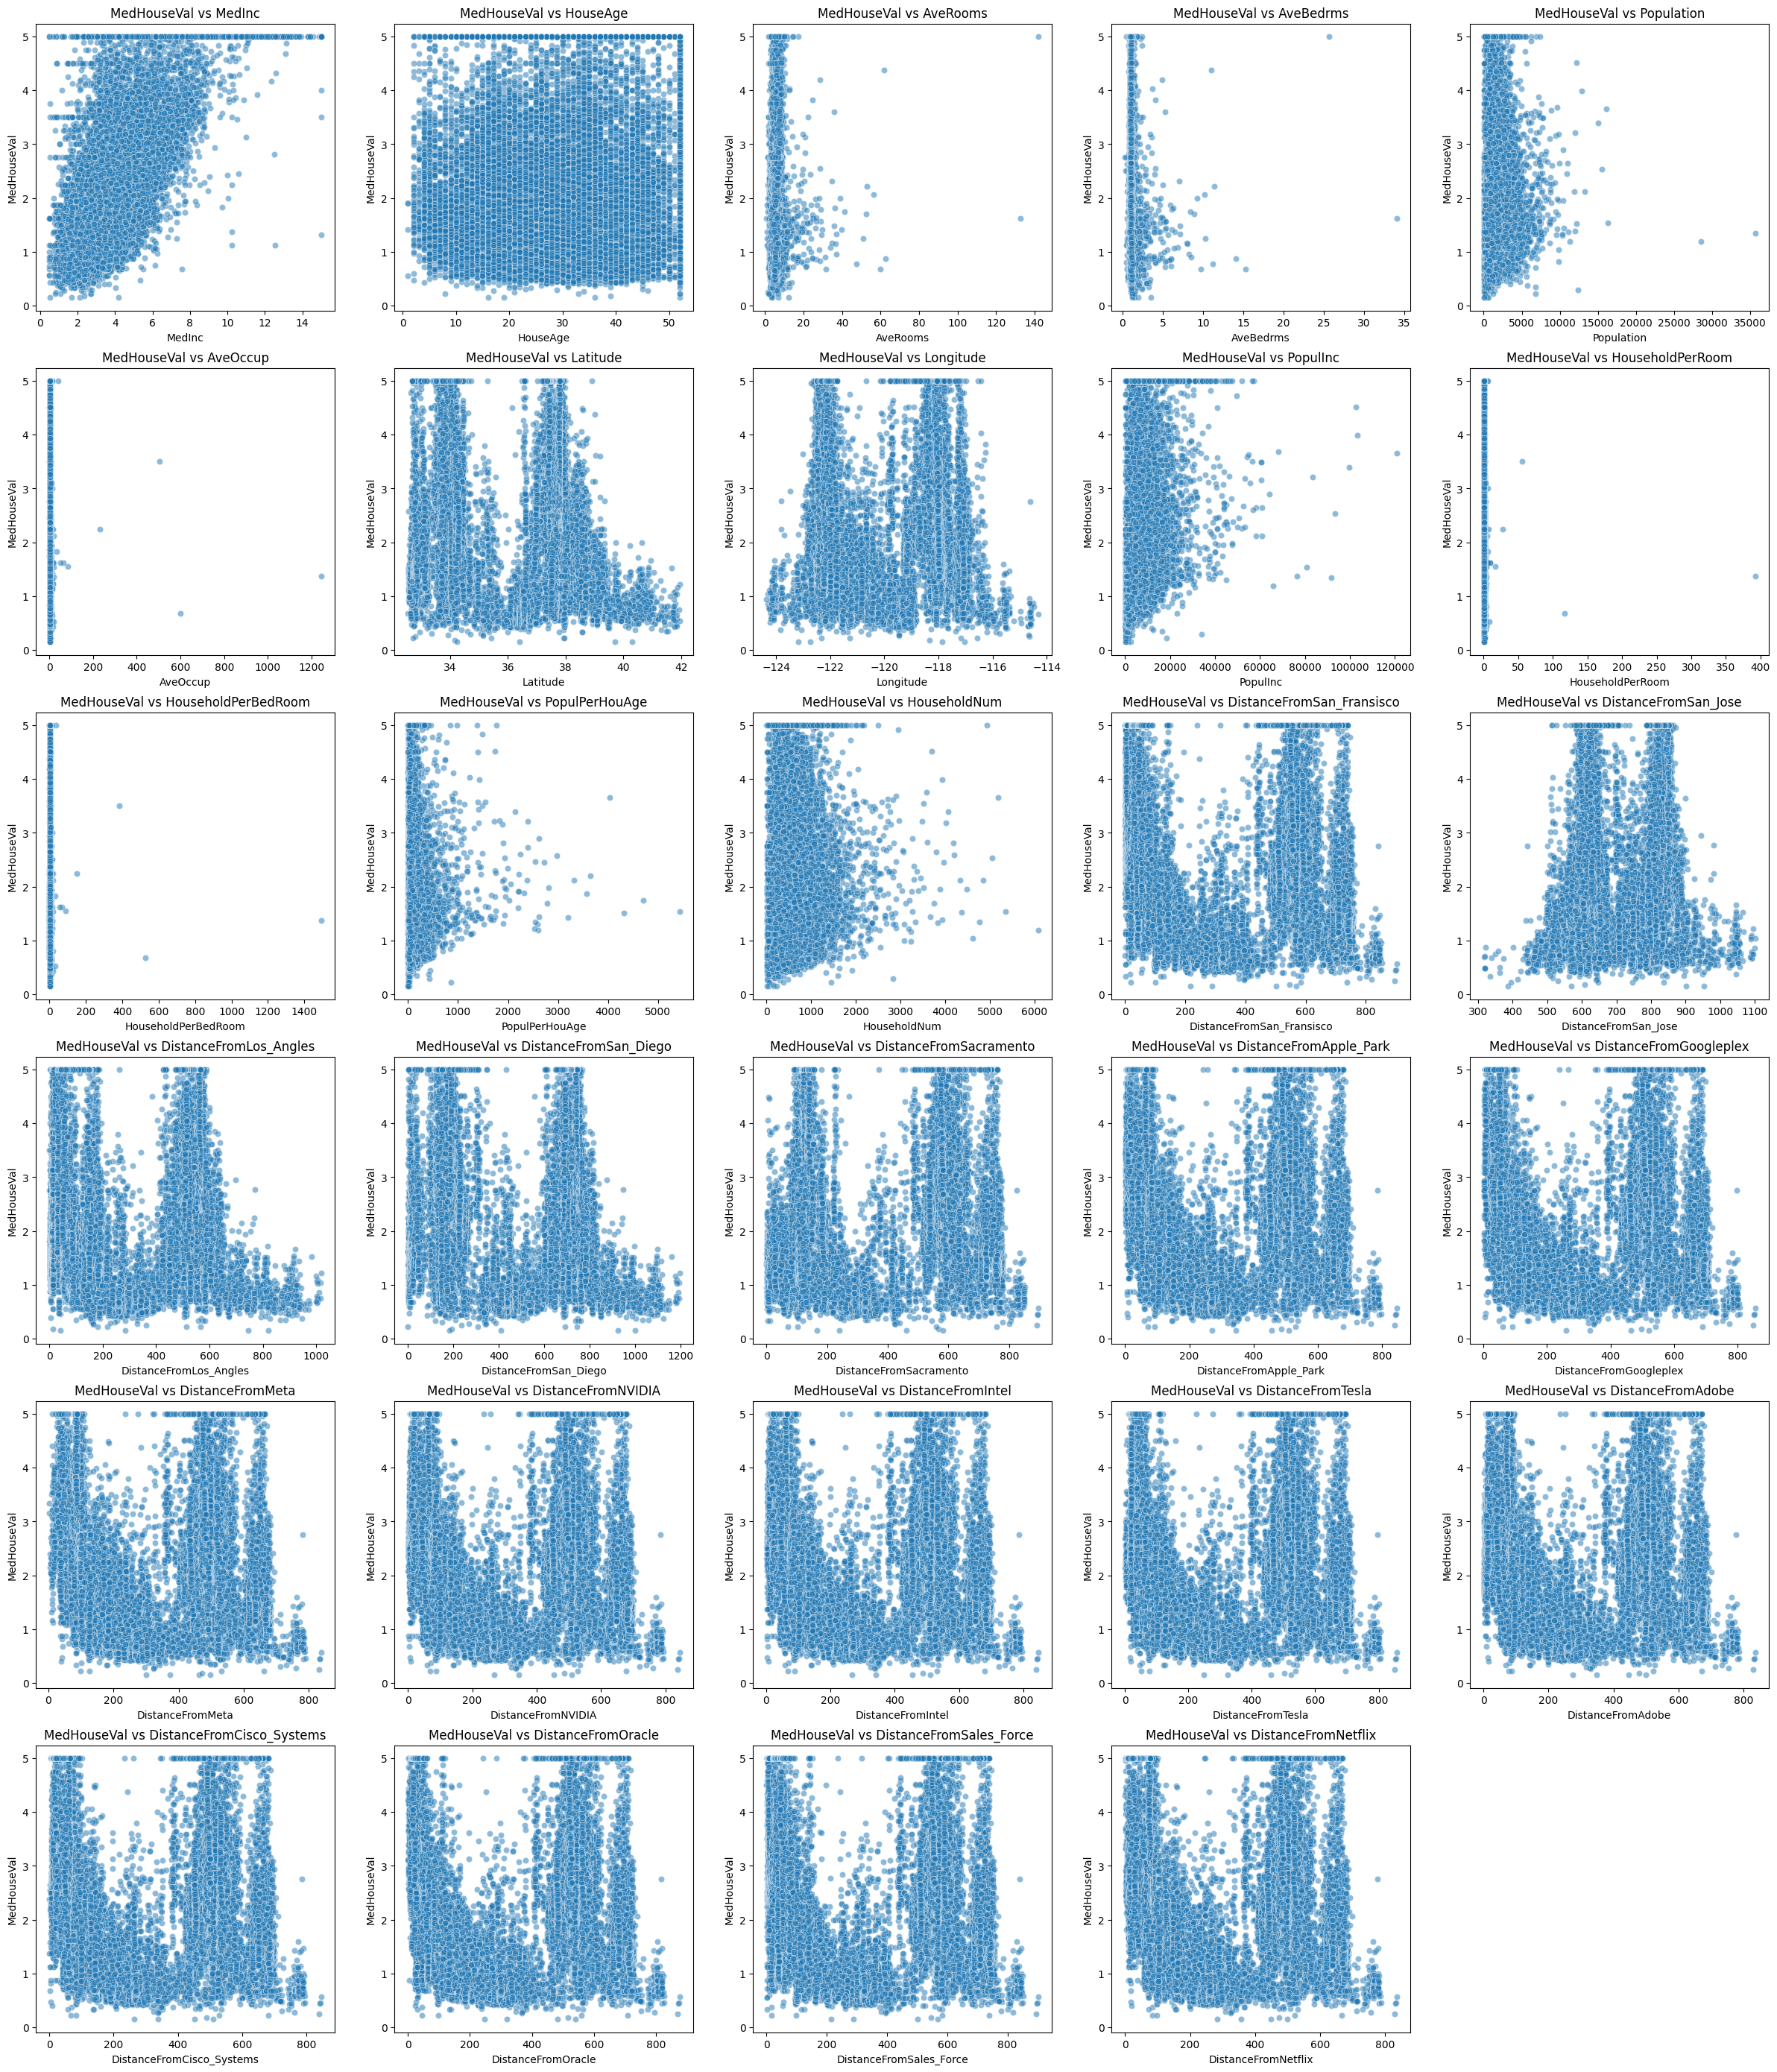

In [ ]:
# Scatter plot function
def scatter_plot(col) :
    global california_df
    sns.scatterplot(data=california_df, x=col, y='MedHouseVal', alpha=0.5)
    plt.title(f'MedHouseVal vs {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('MedHouseVal')

idx = 0
plt.figure(figsize = (30, 35))
df_columns = list(california_df.drop('MedHouseVal', axis = 1).columns)
row = int(np.ceil(np.sqrt(len(df_columns))))
col = int(len(df_columns) / row) + 1
for column in df_columns :
    idx += 1
    plt.subplot(row, col, idx)
    scatter_plot(column)

plt.show()

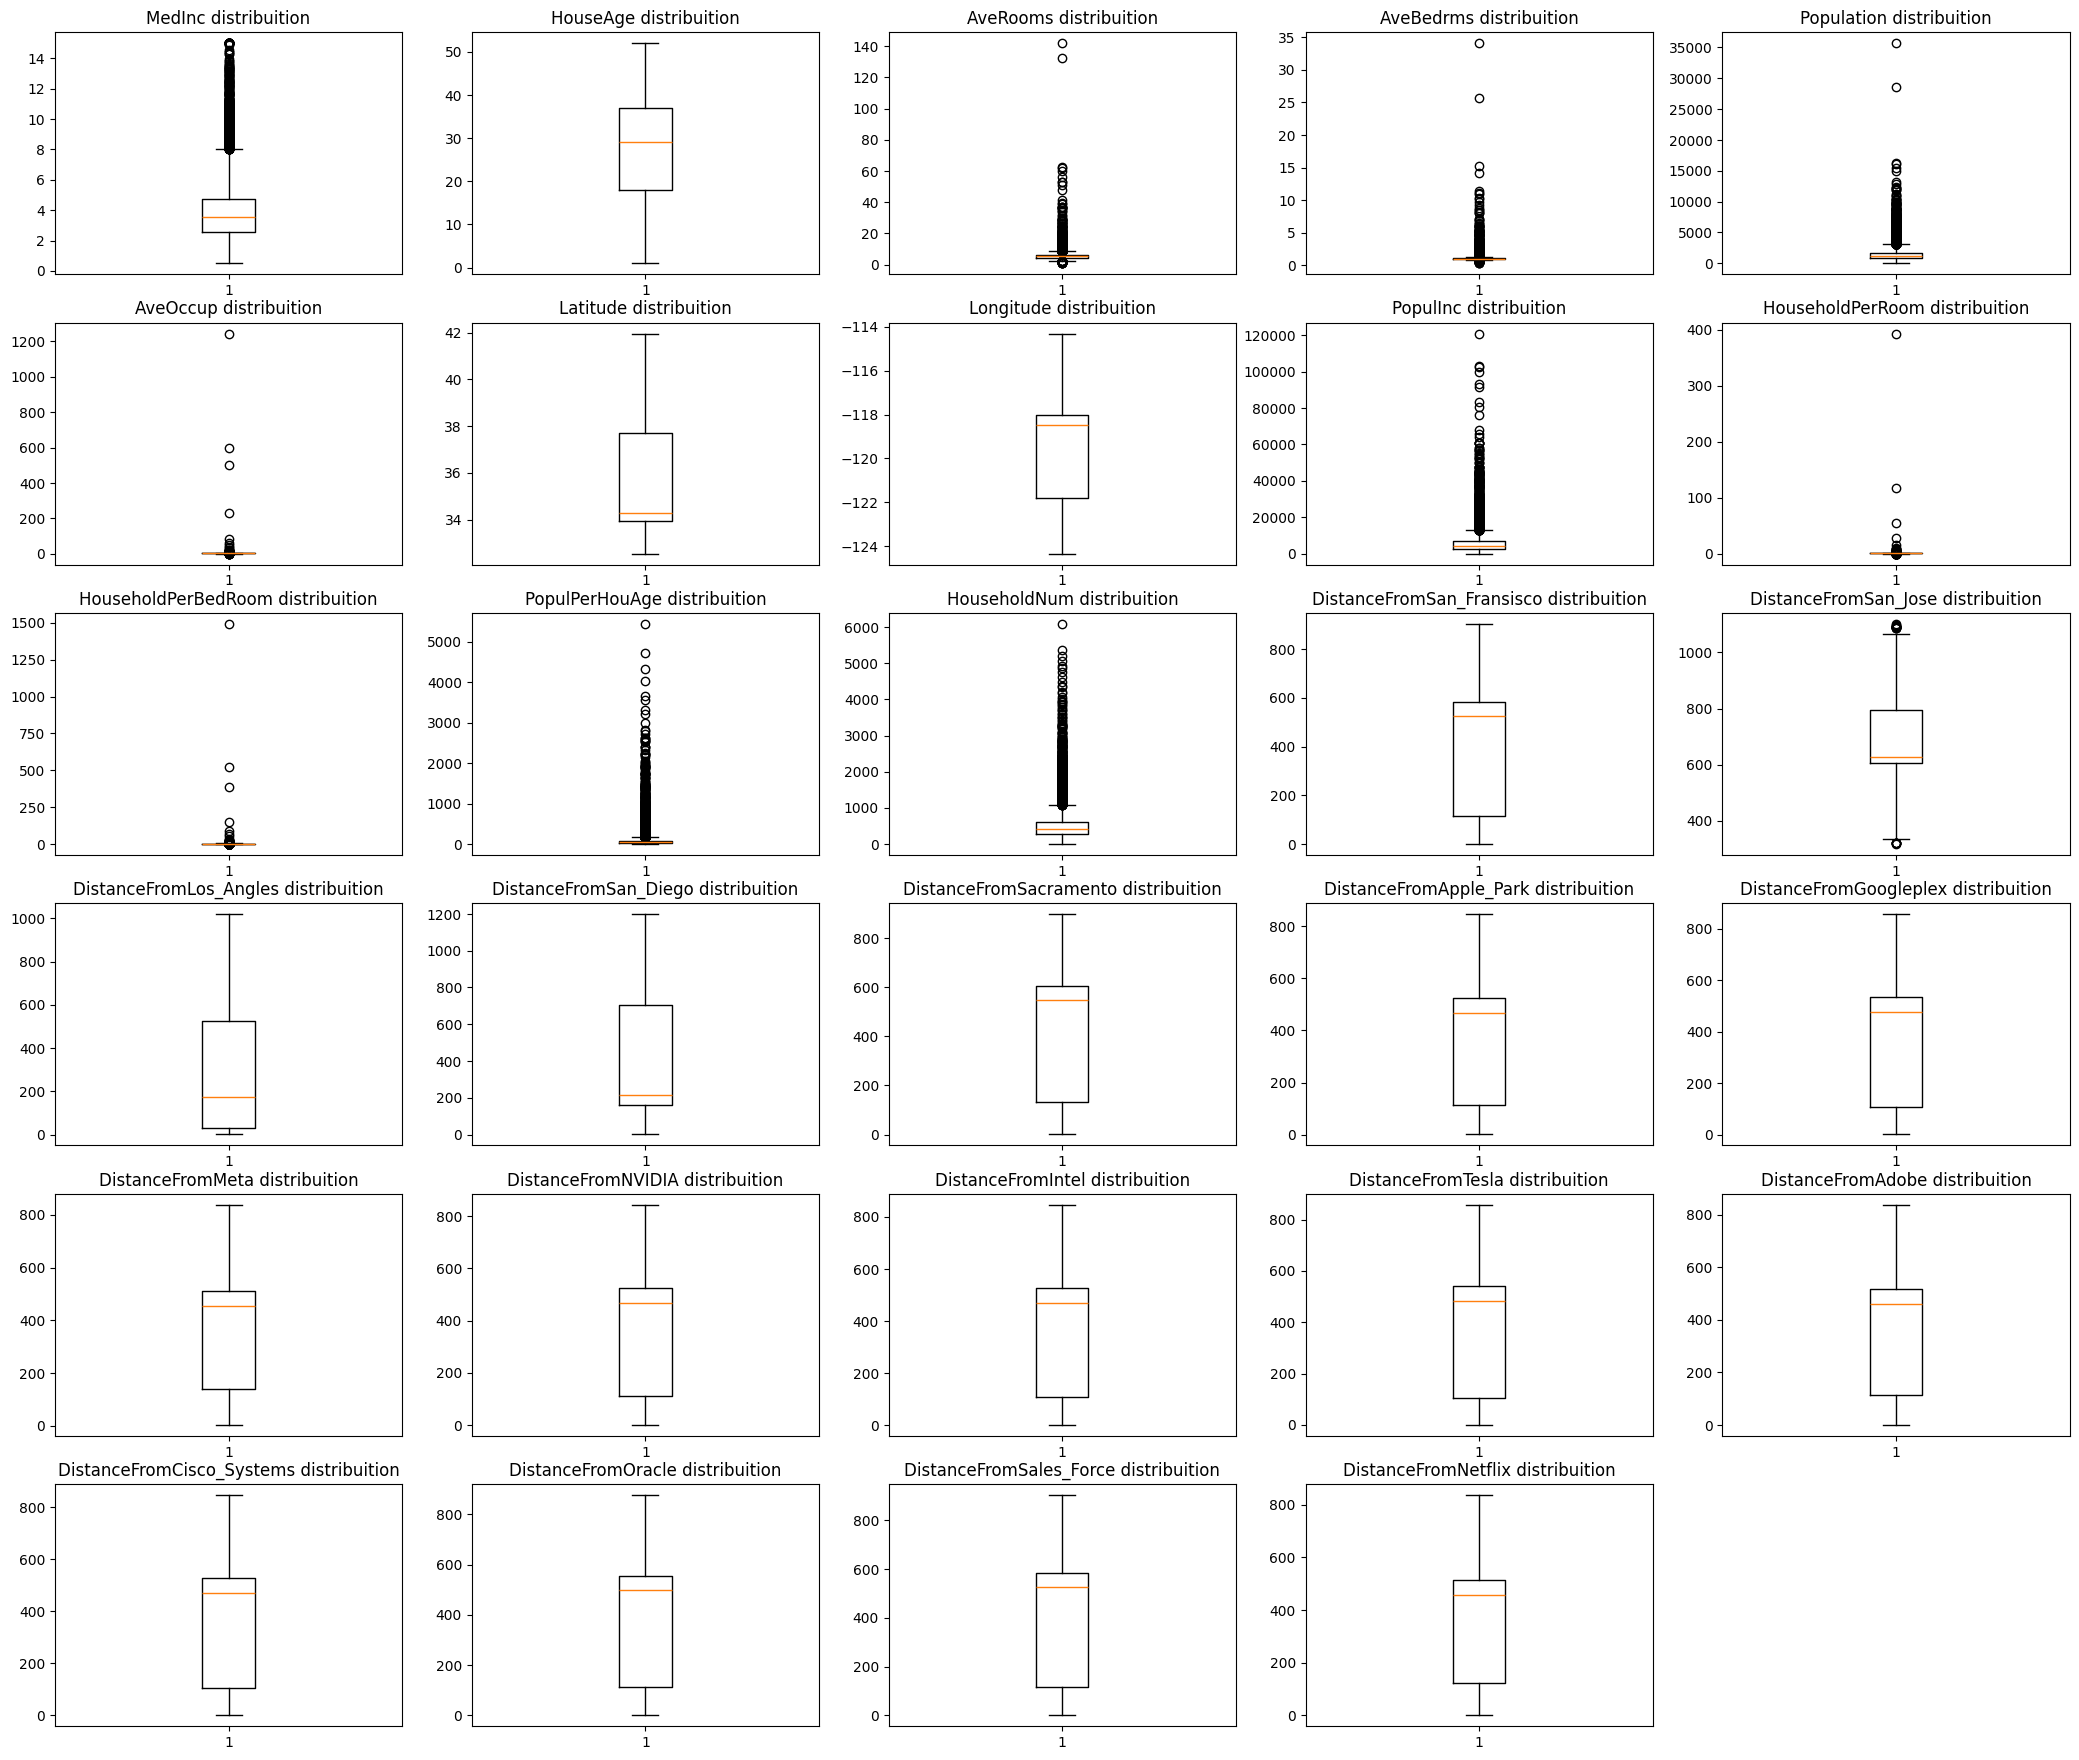

In [ ]:
# Box plot for knowinga data distribution
def box_plot(colx) :
    global california_df
    plt.boxplot(data=california_df, x=colx, label = 'b')
    plt.title(f'{colx} distribuition')

idx = 1
plt.figure(figsize = (26, 22))
for columnx in california_df.drop(['MedHouseVal'], axis = 1).columns :
    plt.subplot(row, col, idx)
    box_plot(columnx)
    idx += 1
plt.show()

In [ ]:
# 3D Scatter plot with colors, x, and y for finding realation between "MedHouseVal" (colors) and another two features
def scatter_plot(colx, coly) :
    global california_df
    plt.scatter(data=california_df, x=colx, y=coly, alpha=0.5, c = 'MedHouseVal', cmap = 'RdBu')
    plt.title(f'{colx} vs {coly}')
    plt.xlabel(f'{colx}')
    plt.ylabel(f'{coly}')

idx = 1
for columnx in california_df.drop(['MedHouseVal'], axis = 1).columns :
    plt.figure(figsize = (28, 32))
    for columny in california_df.drop(['MedHouseVal', columnx], axis = 1).columns :
        plt.subplot(row, col, idx)
        scatter_plot(columnx, columny)
        idx += 1

    idx = 1
    plt.show()

<Axes: >

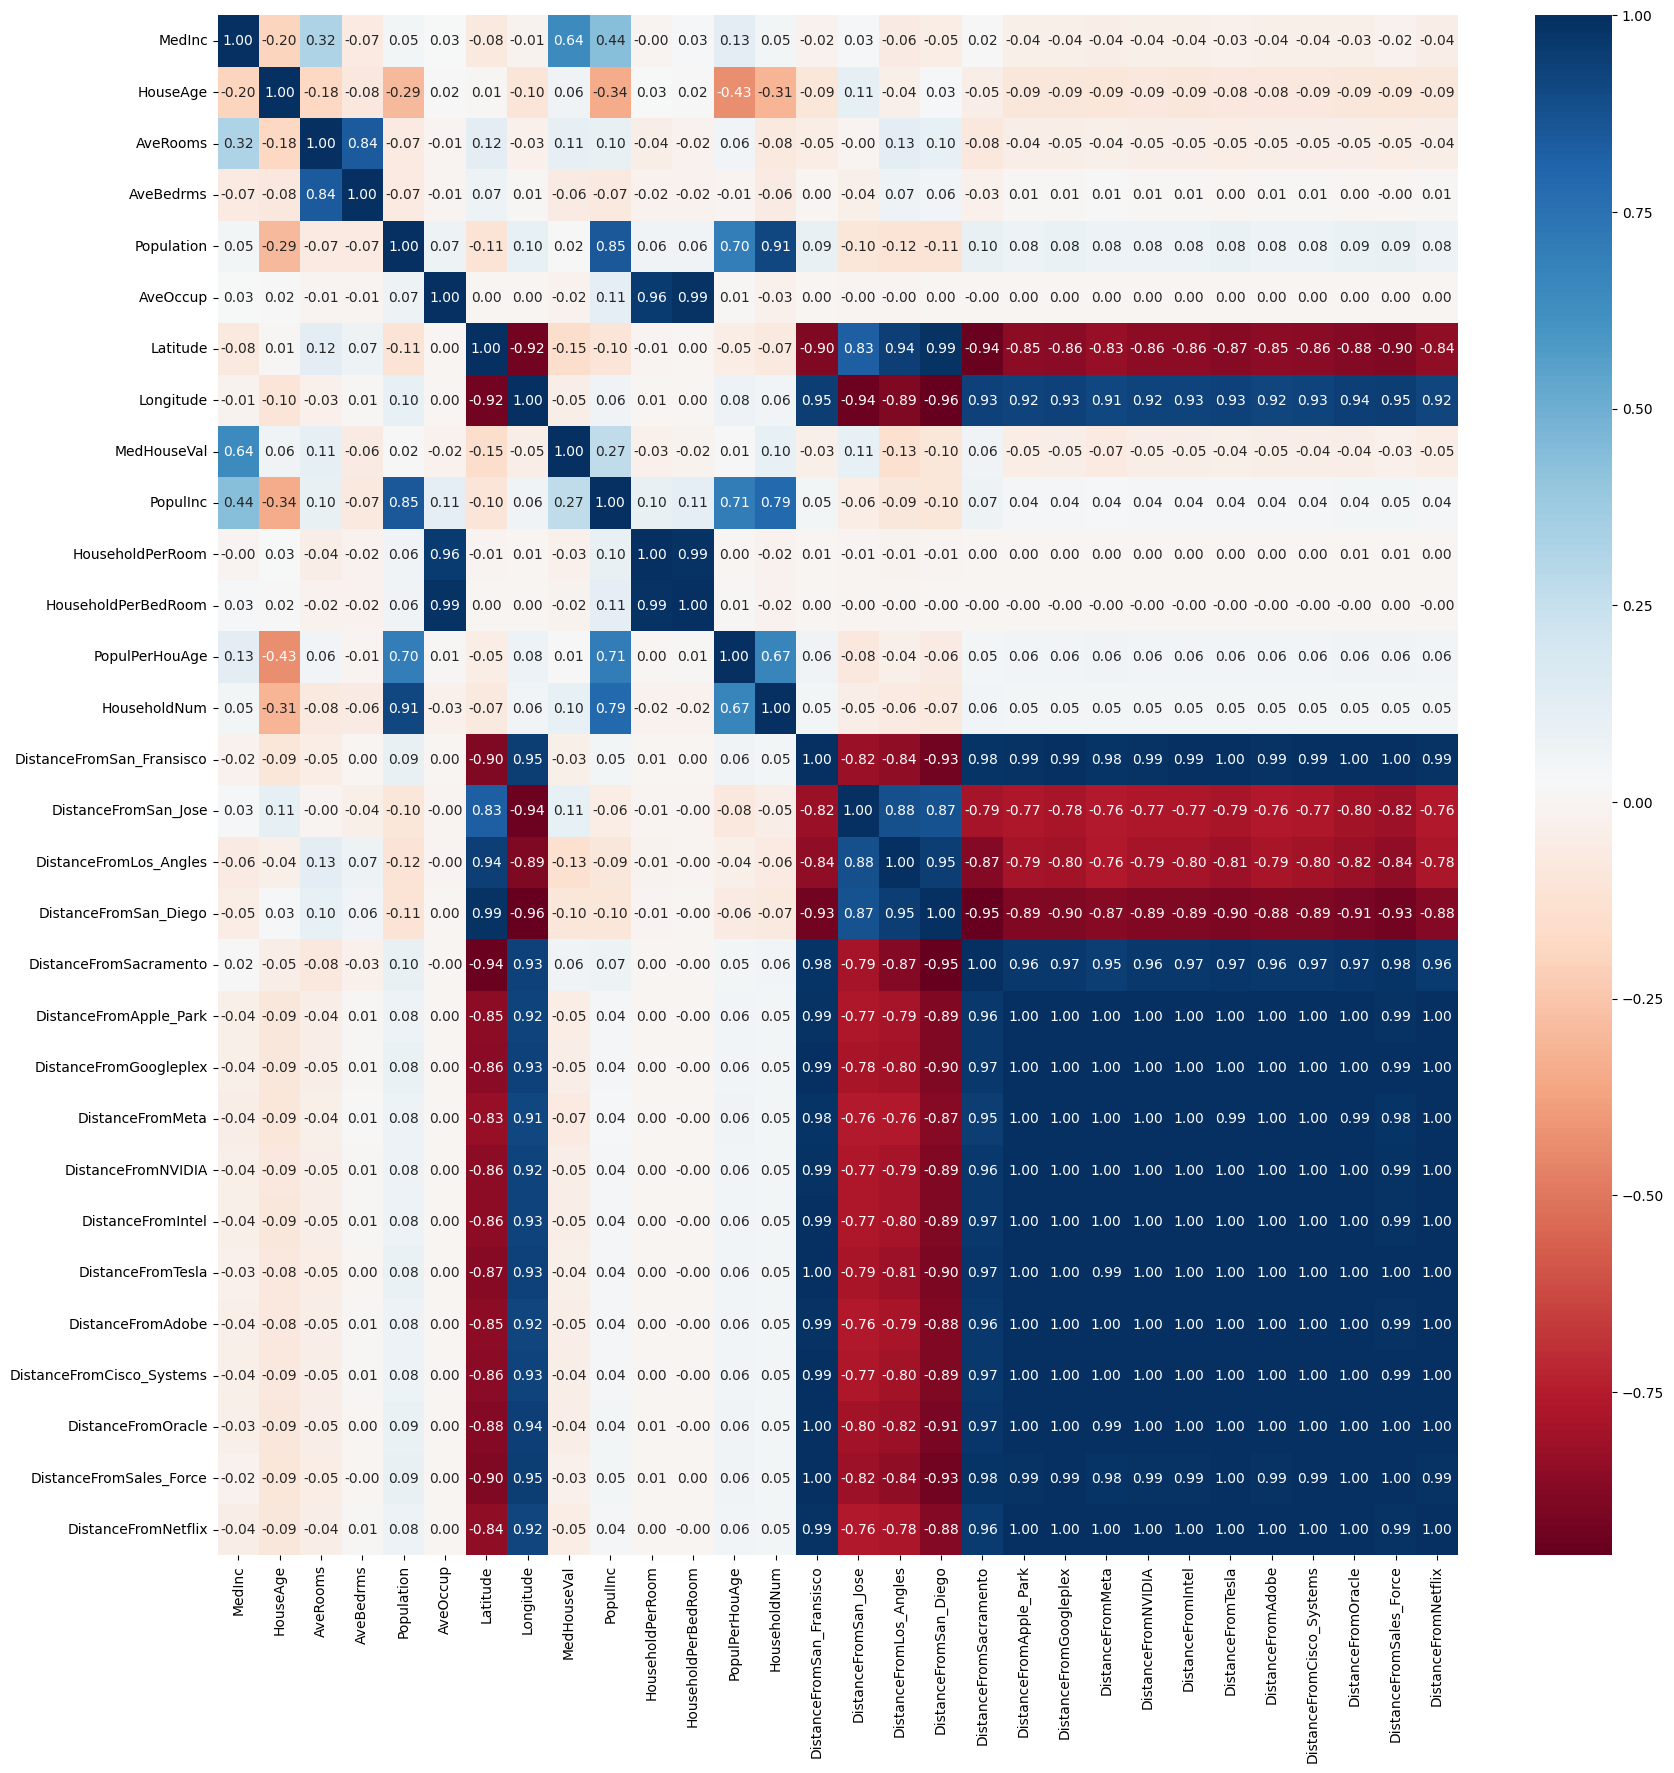

In [ ]:
corr_data = california_df.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr_data, cmap = 'RdBu', fmt = '.2f', annot = True)

In [ ]:
desc_stat.index

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal', 'PopulInc', 'HouseholdPerRoom',
       'HouseholdPerBedRoom', 'PopulPerHouAge', 'HouseholdNum',
       'DistanceFromSan_Fransisco', 'DistanceFromSan_Jose',
       'DistanceFromLos_Angles', 'DistanceFromSan_Diego',
       'DistanceFromSacramento', 'DistanceFromApple_Park',
       'DistanceFromGoogleplex', 'DistanceFromMeta', 'DistanceFromNVIDIA',
       'DistanceFromIntel', 'DistanceFromTesla', 'DistanceFromAdobe',
       'DistanceFromCisco_Systems', 'DistanceFromOracle',
       'DistanceFromSales_Force', 'DistanceFromNetflix'],
      dtype='object')

In [ ]:
labels = desc_stat.iloc[8] # MedHouseVal index in desccc_stat maatrix
IQR = labels['75%'] - labels['25%']
min_label = labels['25%'] - 1.5 * IQR
max_label = labels['75%'] + 1.5 * IQR
condition = (california_df['MedHouseVal'] >= min_label) & (california_df['MedHouseVal'] <= max_label)

california_df = california_df[condition]
(california_df['MedHouseVal'] >= max_label).any()

np.False_

<Axes: >

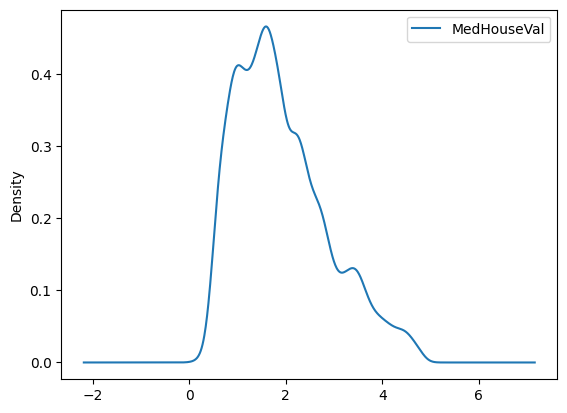

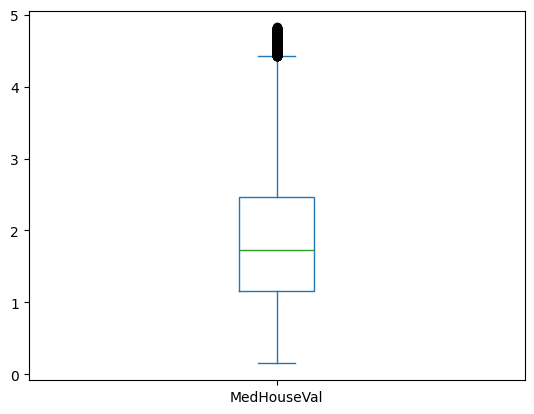

In [ ]:
california_df.plot(y = 'MedHouseVal', kind = 'kde')
california_df.plot(y = 'MedHouseVal', kind = 'box')

# predoction model

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split, GroupKFold
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans

In [ ]:
# prepare data for model
train, test = train_test_split(california_df, train_size = 0.8)
coords = train[['Latitude', 'Longitude']].values
kmeans = KMeans(n_clusters=10, random_state = 0).fit(coords)
groups = kmeans.labels_
model = HistGradientBoostingRegressor(max_depth = 15, max_iter = 200, random_state = 1)
gfk = GroupKFold(n_splits = 5)
xtrain, ytrain = train.drop('MedHouseVal', axis = 1), train['MedHouseVal']
xtest, ytest = test.drop('MedHouseVal', axis = 1), test['MedHouseVal']
result = cross_val_score(model, xtrain, ytrain, cv=gfk.split(xtrain, ytrain,groups = groups) , scoring = 'r2', n_jobs = -1)
print(result)

[ 0.54058832  0.52475631 -0.14612437  0.02562483  0.05404022]


In [ ]:
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

r2 = r2_score(ytest, y_pred)
rmse = root_mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)

In [ ]:
print(f'r2 score : {r2}')
print(f'root mean squared error : {rmse}')
print(f'mean absolute error : {mae}')

r2 score : 0.8427465630116798
root mean squared error : 0.38346742339249973
mean absolute error : 0.26331503543037493
